# Analyzing Milwaukee Police Call Data and Weather Data
### Grant Fass and Chris Hubbell

## Introduction
Across the world, there are many crimes commited every hour. One of the greatest challenges is reducing crime and maintaining safety for citizens. Part of preventing crime relies on the reporting of it by citizens. If nobody informs the police, the police are unable to act. This is why reporting crimes and incidents is so important, especially when people's lives are in danger. In Wisconsin, Milwaukee Police Department (MPD) releases data regarding all of their dispatch calls, which we have been able to get since 2016. This allows for analyzing trends of crime reporting over time as well as as it relates to other factors. In 2010, Milwaukee installed a new system for detecting gun shots called ShotSpotter, which was expanded into more neighborhoods in 2014. This system is capable of detecting when a shot is fired and where it was to a high degree of accuracy. The data consists of both ShotSpotter calls as well as Shots Fired calls. The key difference is that Shots Fired are calls from people and ShotSpotter are automatic.

## Research Questions:
- Is there a significant difference between the distribution of shots spotted over time and calls for shots fired?
- Is there a significant difference in the number of calls that were unable to be located for shots fired calls compared to shots spotted?
- Does the number of shots spotted and fired correlate with certain dates including holidays and events?
- Does the number of calls correlate with certain weather conditions?
- Is it possible to predict number of calls based on location and district?
- Is it possible to predict the nature of a call based on its location and district?

## Hypotheses:
- There are significantly more shots spotted than calls about shots fired.
- Significantly more shots fired calls are unable to be located than shots spotted.
- There will be significantly more shots spotted calls on July 4th, Dec. 31st, and Jan 1st than normal days.
- There will be significantly less shots fired calls on holidays than normal days.
- There are significantly more calls on days with clear weather than inclement weather.
- There are significantly more calls on days around 75 degrees than there are on days around 95 or 55 degrees.
- The number of calls will be able to be predicted based on location and district.
- The type of call will be unable to be predicted based on location and district.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import Image
sns.set()

In [2]:
# pip install matplotlib_venn --upgrade --user

https://www.glerl.noaa.gov/metdata/mil/archive/ 

In [3]:
# pip install pandas --upgrade --user

In [4]:
# pip install numexpr --upgrade --user

In [5]:
# pip install seaborn --upgrade --user

In [6]:
# pip install scipy --upgrade --user

The first data set that will be evaluated in this notebook is stored in `mkecallswheader.csv`. This dataset comes from requesting the bulk data option from a [website](https://mpd.digitalpublicworks.com/?start=2019-01-05T00:00:00-06:00&end=2019-01-05T23:59:59.999999-06:00) that scrapes the milwaukee police department call logs found [here](https://itmdapps.milwaukee.gov/MPDCallData/) and stores them. This data is stored in a postgres server. The official .gov site shows that the data should have headers of call number, date/time, location, police district, nature of call, and status. The bulk data stored in the .csv file has a couple extra headers of id, inserted_at, updated_at, and point. These features will need to be dropped later on since they do not pertain to the data itself and are an artifact of how the data was stored.

In [7]:
original_data = pd.read_csv("mkecallswheader.csv")

In [8]:
original_data.head(10)

,id,time,location,district,nature,status,inserted_at,updated_at,point,call_id
0,2093116,2019-05-21 15:19:03,"7420 W GOOD HOPE RD,MKE",4,ACC PI,Service in Progress,2019-05-21 20:51:09,2019-05-21 20:51:09,0101000020E6100000FC7C94111793454061D971683600...,191411633
1,2093127,2019-05-21 15:24:30,"1421 N 27TH ST,MKE",3,TRAFFIC STOP,City Citation(s) Issued,2019-05-21 20:57:11,2019-05-21 20:57:11,0101000020E6100000D2AB014A4386454067C416CCA9FC...,191411672
2,2093141,2019-05-21 15:25:46,"4054 N 71ST ST,MKE",7,SUBJ WANTED,Assignment Completed,2019-05-21 21:00:12,2019-05-21 21:00:12,0101000020E610000053FFC5D8AE8B45402CAE3B270700...,191411674
3,2093805,2019-05-21 20:46:28,"245 W LINCOLN AV,MKE",2,SPECIAL ASSIGN,Service in Progress,2019-05-22 02:22:32,2019-05-22 02:22:32,0101000020E610000078ABF8D04F804540633ABE0779FA...,191412545
4,2093816,2019-05-21 20:50:03,"1721 W CANAL ST,MKE",3,TRBL W/SUBJ,Unable to Locate Complainant,2019-05-22 02:25:33,2019-05-22 02:25:33,0101000020E6100000E8323509DE834540C3D7D7BAD4FB...,191412465
5,2093829,2019-05-21 21:02:37,"E WRIGHT ST / N WEIL ST,MKE",5,PARK AND WALK,Service in Progress,2019-05-22 02:37:36,2019-05-22 02:37:36,0101000020E6100000DEF1DC312B88454059D878558CF9...,191412584
6,2093872,2019-05-21 20:50:47,"9010 N 95TH ST,MKE",4,WELFARE CITIZEN,Advised,2019-05-22 02:52:43,2019-05-22 02:52:43,0101000020E6100000357D76C07597454080B4FF01D601...,191412544
7,2093887,2019-05-21 21:25:33,"983 W ARTHUR AV,MKE",2,BATTERY DV,Service in Progress,2019-05-22 03:01:48,2019-05-22 03:01:48,0101000020E6100000BC033C69E17F454041ABDDC02EFB...,191412632
8,2093918,2019-05-21 21:36:05,"4115 N 56TH ST,MKE",7,RETURN STATION,Assignment Completed,2019-05-22 03:16:51,2019-05-22 03:16:51,0101000020E610000014483FD0C08B45404EB747CAF1FE...,191412656
9,2093929,2019-05-21 21:45:53,"7806 W HAMPTON AV,MKE",7,TRAFFIC STOP,Advised,2019-05-22 03:22:52,2019-05-22 03:22:52,0101000020E6100000F6F0C05B7B8D45404F34B4A69E00...,191412676


In [9]:
original_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4027695 entries, 0 to 4027694
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   id           4027695 non-null  int64 
 1   time         4027695 non-null  object
 2   location     4027695 non-null  object
 3   district     3937463 non-null  object
 4   nature       4027695 non-null  object
 5   status       4027695 non-null  object
 6   inserted_at  4027695 non-null  object
 7   updated_at   4027695 non-null  object
 8   point        3958766 non-null  object
 9   call_id      4027695 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 307.3+ MB


In [10]:
original_data.describe()

,id,call_id
count,4.027695e+06,4.027695e+06
mean,5.589211e+06,1.891808e+08
std,2.392488e+07,1.459309e+07
min,1.000000e+00,1.630815e+08
25%,1.006924e+06,1.732129e+08
50%,2.013848e+06,1.906707e+08
75%,3.020772e+06,2.016115e+08
max,1.635417e+08,2.201010e+08


From the above calls to the [`.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html), [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html), and [`.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) methods it is possible to see that there are 10 total features. Of these features there are two features that are formatted as integers and eight features formatted as the default object that pandas imports non-numerical features as. From the object classified features there are a few that can be converted to new types. The time column should be formatted as a date time object. District should be converted to a numerical categorical value. Nature and status should be converted to categorical features. Location should be kept as an object feature. More features should be extracted from the location in order to draw further observations. Both street name and street suffix would be good features to extract.

The first step is to copy the data into a new dataframe so that the original data can be preserved

In [11]:
mpd_data = original_data.copy(deep=True)

All of the postgres features that are not part of the data can be dropped in the next step. These are the headers of id, inserted_at, updated_at, and point.

In [12]:
mpd_data = mpd_data.drop('id', axis=1)
mpd_data = mpd_data.drop('inserted_at', axis=1)
mpd_data = mpd_data.drop('updated_at', axis=1)
mpd_data = mpd_data.drop('point', axis=1)

Now the time feature can be converted into a date time object.

In [13]:
mpd_data['datetime'] = pd.to_datetime(mpd_data['time'], infer_datetime_format=True)
mpd_data = mpd_data.drop('time', axis=1)

In [14]:
mpd_data.head()

,location,district,nature,status,call_id,datetime
0,"7420 W GOOD HOPE RD,MKE",4,ACC PI,Service in Progress,191411633,2019-05-21 15:19:03
1,"1421 N 27TH ST,MKE",3,TRAFFIC STOP,City Citation(s) Issued,191411672,2019-05-21 15:24:30
2,"4054 N 71ST ST,MKE",7,SUBJ WANTED,Assignment Completed,191411674,2019-05-21 15:25:46
3,"245 W LINCOLN AV,MKE",2,SPECIAL ASSIGN,Service in Progress,191412545,2019-05-21 20:46:28
4,"1721 W CANAL ST,MKE",3,TRBL W/SUBJ,Unable to Locate Complainant,191412465,2019-05-21 20:50:03


In [15]:
# https://stackoverflow.com/a/43427677 for arguments to get null counts
mpd_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4027695 entries, 0 to 4027694
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   location  4027695 non-null  object        
 1   district  3937463 non-null  object        
 2   nature    4027695 non-null  object        
 3   status    4027695 non-null  object        
 4   call_id   4027695 non-null  int64         
 5   datetime  4027695 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 184.4+ MB


In [16]:
mpd_data.describe()

,call_id
count,4.027695e+06
mean,1.891808e+08
std,1.459309e+07
min,1.630815e+08
25%,1.732129e+08
50%,1.906707e+08
75%,2.016115e+08
max,2.201010e+08


The nature, status, and district features will now be converted into categorical features

In [17]:
mpd_data['district'].unique()

array(['4', '3', '7', '2', '5', '6', '1', nan, 'OCOE', 'OUT', 'NTF',
       'SPD', 'CITY', 'ICS3', 'CIB', 'DPR', 'TRU', 'SCD', 'ICS', 'SF',
       'NLA', 'ICS1', 'IFC', 'FI', 'SID', 'D0', 'ICS7', 'ICS5', 'JUNE',
       'DDAC', 'MIRT', 'ICS6', 'ID', 'ADMN', 'TEU', 'MID', 'NID'],
      dtype=object)

In [18]:
mpd_data['district'].value_counts()

3       673002
7       650109
5       567958
4       552701
2       545253
6       473525
1       448786
CITY      7080
NTF       6274
SPD       5477
OCOE      3316
OUT       2249
DDAC       399
SCD        300
DPR        277
ICS1       229
CIB        218
FI          83
SF          55
NLA         34
ICS3        32
SID         31
ICS         23
TEU         16
ICS5         9
JUNE         5
ICS6         4
IFC          4
TRU          3
D0           2
MIRT         2
ADMN         2
NID          2
ICS7         1
ID           1
MID          1
Name: district, dtype: int64

Running a value counts on the different districts shows that there are more than the expected number of police districts in the city of Milwaukee present in the data. There should only be districts one through seven. Instead the data contains more districts than expected. These districts will be converted into categorical anyways as their entries will be useful for some observations. The erraneous districts will likely be ignored when drawing district based conclusions as it is not known what the other districts mean. District will be converted to a categorical with 36 different categories.

In [19]:
mpd_data['nature'].unique()

array(['ACC PI', 'TRAFFIC STOP', 'SUBJ WANTED', 'SPECIAL ASSIGN',
       'TRBL W/SUBJ', 'PARK AND WALK', 'WELFARE CITIZEN', 'BATTERY DV',
       'RETURN STATION', 'BUSINESS CHECK', 'SUSPICIOUS-OTH', 'REPORTS',
       'THEFT', 'VIOL REST ORDER', 'SUBJ WITH GUN', 'TAVERN CHECK',
       'PATROL', 'FOLLOW UP', 'ACC PDO', 'TRAFFIC HAZARD',
       'FAMILY TROUBLE', 'NON PURSUIT', 'BATTERY', 'INVESTIGATION',
       'PRISONER TRANS', 'BUS INV', 'CALL FOR POLICE', 'THEFT VEHICLE',
       'SUSP PERS/AUTO', 'ENTRY TO AUTO', 'ASSIGNMENT', 'PROPERTY DAMAGE',
       'IND EXPOSURE', 'NOISE NUISANCE', 'PROPERTY PICKUP', 'SOLICITING',
       'STOLEN VEHICLE', 'OUT OF SERVICE', 'COURT DUTY', 'ENTRY',
       'PARKING TROUBLE', 'GRAFFITI', 'TRBL W/JUV', 'SHOTS FIRED',
       'SHOTSPOTTER', 'BUS INVESTIGATIO', 'THREAT', 'SUBJ WITH WEAPON',
       'TRAFFIC LASER', 'HOME VISIT DV', 'COMMUNITY MTNG',
       'CITIZEN CONTACT', 'RECK USE OF WEAP', 'ABAND/STOLEN PRO',
       'ASSIGN-ADMN MPD', 'CONVEY PROPERTY',

In [20]:
mpd_data['nature'].value_counts()

TRAFFIC STOP        401644
BUSINESS CHECK      325863
TRBL W/SUBJ         237324
RETURN STATION      209934
FOLLOW UP           150661
                     ...  
ACC PD1                  1
ABAND/LOST               1
2831 N 21ST              1
THREAT TO SCHOOL         1
STOLEN PROP              1
Name: nature, Length: 317, dtype: int64

Because there are 317 different natures we will be focusing the data on a few select natures of intrest. There are 4027695 entries in the data. Selected natures and their counts are as shown below:
- TRAFFIC STOP        401644
- SHOTSPOTTER          65381
- SHOTS FIRED          47331
    - SHOTS FIRED-DV      27
- SUBJ WITH GUN        44509
    - SUBJ W/GUN           2741
    - SUBJ WITH GUN-DV     708
- SUBJ WITH WEAPON     30101
    - SUBJ W/WEAP         2096
    - SUBJ W/WEAPON-DV    1336
- RECK USE OF WEAP     17524
- SHOOTING             7054

Indented natures will be combined into the larger nature above them. Nature will then be turned into a categorical value.

In [21]:
def remap_natures(nature: str) -> str:
    if nature == "SHOTS FIRED-DV":
        return "SHOTS FIRED"
    elif nature == "SUBJ W/GUN":
        return "SUBJ WITH GUN"
    elif nature == "SUBJ WITH GUN-DV":
        return "SUBJ WITH GUN"
    elif nature == "SUBJ W/WEAP":
        return "SUBJ WITH WEAPON"
    elif nature == "SUBJ W/WEAPON-DV":
        return "SUBJ WITH WEAPON"
    else:
        return nature

In [22]:
mpd_data.shape

(4027695, 6)

In [23]:
mpd_data['nature'] = mpd_data['nature'].map(remap_natures)
mask = mpd_data['nature'].isin(['TRAFFIC STOP', 'SHOTSPOTTER', 'SHOTS FIRED', 'SHOTS FIRED-DV', 
'SUBJ WITH GUN', 'SUBJ W/GUN', 'SUBJ WITH GUN-DV', 'SUBJ WITH WEAPON', 'SUBJ W/WEAP', 'SUBJ W/WEAPON-DV', 'RECK USE OF WEAP', 'SHOOTING'])
focused_data = mpd_data[mask]
# focused_data['nature'] = focused_data['nature'].map(remap_natures)
focused_data.shape

(620452, 6)

In [24]:
mpd_data = focused_data.copy(deep=True)
mpd_data = mpd_data.reset_index()
mpd_data = mpd_data.drop('index', axis=1)
mpd_data.shape

(620452, 6)

In [25]:
mpd_data.head()

,location,district,nature,status,call_id,datetime
0,"1421 N 27TH ST,MKE",3,TRAFFIC STOP,City Citation(s) Issued,191411672,2019-05-21 15:24:30
1,"7806 W HAMPTON AV,MKE",7,TRAFFIC STOP,Advised,191412676,2019-05-21 21:45:53
2,"5250 W LISBON AV,MKE",3,TRAFFIC STOP,Advised,191412770,2019-05-21 22:29:10
3,"3123 W GREENFIELD AV,MKE",2,SUBJ WITH GUN,Advised/Referral,191412917,2019-05-21 23:48:22
4,"2675 N 51ST ST,MKE",3,TRAFFIC STOP,Advised,191420086,2019-05-22 00:54:53


In [26]:
mpd_data['status'].unique()

array(['City Citation(s) Issued', 'Advised', 'Advised/Referral',
       'Unable to Locate Complainant', 'Assignment Completed',
       'Service in Progress', 'Cleared by Arrest', 'To be Filed',
       'No Prosecution', 'Open Investigation',
       'Filed Driver Exchange Report', 'Referral', 'False Alarm',
       'State Citation(s) Issued', 'Ordered to Appear', 'Patrol Request'],
      dtype=object)

In [27]:
mpd_data['status'].value_counts()

Advised                         214988
Service in Progress             136530
City Citation(s) Issued         124219
Unable to Locate Complainant     68869
Assignment Completed             37832
Advised/Referral                 17203
To be Filed                      15869
Open Investigation                2659
Cleared by Arrest                 1191
No Prosecution                     705
Referral                           209
State Citation(s) Issued           104
False Alarm                         38
Patrol Request                      17
Filed Driver Exchange Report        16
Ordered to Appear                    3
Name: status, dtype: int64

Status looks normal as well and will be converted to a categorical value.

In [28]:
mpd_data['district'] = mpd_data['district'].astype("category")
mpd_data['nature'] = mpd_data['nature'].astype("category")
mpd_data['status'] = mpd_data['status'].astype('category')

In [29]:
mpd_data['district'].dtype

CategoricalDtype(categories=['1', '2', '3', '4', '5', '6', '7', 'CITY', 'DDAC', 'DPR',
                  'ICS', 'ICS1', 'ICS3', 'ICS6', 'NLA', 'NTF', 'OCOE', 'OUT',
                  'SF', 'SPD', 'TEU'],
, ordered=False)

In [30]:
mpd_data['nature'].dtype

CategoricalDtype(categories=['RECK USE OF WEAP', 'SHOOTING', 'SHOTS FIRED', 'SHOTSPOTTER',
                  'SUBJ WITH GUN', 'SUBJ WITH WEAPON', 'TRAFFIC STOP'],
, ordered=False)

In [31]:
mpd_data['status'].dtype

CategoricalDtype(categories=['Advised', 'Advised/Referral', 'Assignment Completed',
                  'City Citation(s) Issued', 'Cleared by Arrest',
                  'False Alarm', 'Filed Driver Exchange Report',
                  'No Prosecution', 'Open Investigation', 'Ordered to Appear',
                  'Patrol Request', 'Referral', 'Service in Progress',
                  'State Citation(s) Issued', 'To be Filed',
                  'Unable to Locate Complainant'],
, ordered=False)

The nature, status, and district features are now formatted as categories.

The last step is to extract features from the location category

In [32]:
def get_street_info(address: str) -> (int, str, str, int):
    """
    This method will take in a string representing an address and will return the information present in that address.
    Some example addresses are as follows:
        0             7420 W GOOD HOPE RD,MKE
        1                  1421 N 27TH ST,MKE
        2                  4054 N 71ST ST,MKE
        3                245 W LINCOLN AV,MKE
        4                 1721 W CANAL ST,MKE
        5         E WRIGHT ST / N WEIL ST,MKE
        6                  9010 N 95TH ST,MKE
    :param address: the string passed in representing the address
    :return: a tuple containing (home number, street name, street type)
    :auth: Grant Fass
    :since: 8 February 2022
    """
    street_type_lookup = ["ALY", "ANX", "ARC", "AVE", "BYU", "BCH", "BND", "BLF", "BLFS", "BTM", "BLVD", "BR", "BRG", "BRK", "BRKS", "BG", "BGS", "BYP", "CP", "CYN", "CPE",
                          "CSWY", "CTR", "CTRS", "CIR", "CIRS", "CLF", "CLFS", "CLB", "CMN", "CMNS", "COR", "CORS", "CRSE", "CT", "CTS", "CV", "CVS", "CRK", "CRES", "CRST", 
                          "XING", "XRD", "XRDS", "CURV", "DL", "DM", "DV", "DR", "EST", "ESTS", "EXPY", "EXT", "EXTS", "FALL", "FLS", "FRY", "FLD", "FLDS", "FLT", "FLTS", 
                          "FRD", "FRDS", "FRST", "FRG", "FRGS", "FRK", "FRKS", "FT", "FWY", "GDN", "GDNS", "GTWY", "GLN", "GLNS", "GRN", "GRNS", "GRV", "GRVS", "HBR", "HBRS", 
                          "HVN", "HTS", "HWY", "HL", "HLS", "HOLW", "INLT", "IS", "ISS", "ISLE", "JCT", "JCTS", "KY", "KYS", "KNL", "KNLS", "LK", "LKS", "LAND", "LNDG", "LN",
                          "LGT", "LGTS", "LF", "LCK", "LCKS", "LDG", "LOOP", "MALL", "MNR", "MNRS", "MDW", "MDWS", "MEWS", "ML", "MLS", "MSN", "MTWY", "MT", "MTN", "MTNS", 
                          "NCK", "ORCH", "OVAL", "OPAS", "PARK", "PKWY", "PASS", "PSGE", "PATH", "PIKE", "PNE", "PNES", "PL", "PLN", "PLNS", "PLZ", "PT", "PTS", "PRT", "PRTS", 
                          "PR", "RADL", "RAMP", "RNCH", "RPD", "RPDS", "RST", "RDG", "RDGS", "RIV", "RD", "RDS", "RTE", "ROW", "RUE", "RUN", "SHL", "SHLS", "SHR", "SHRS", 
                          "SKWY", "SPG", "SPGS", "SPUR", "SQ", "SQS", "STA", "STRA", "STRM", "ST", "STS", "SMT", "TER", "TRWY", "TRCE", "TRAK", "TRFY", "TRL", "TRLR", "TUNL",
                          "TPKE", "UPAS", "UN", "UNS", "VLY", "VLYS", "VIA", "VW", "VWS", "VLG", "VLGS", "VL", "VIS", "WALK", "WALL", "WAY", "WAYS", "WL", "WLS", "AV"]
    # this is used primarily for error checking
    unmatched_suffix = ""
    # remove the ,MKE suffix from the location if present
    address = address.removesuffix(",MKE")
    # Array containing the seperate addresses in the passed entry
    addresses = []
    # Check if the entry contains a / or not.
    # The presence of a / denotes the entry as a corner with two streets present
    # For example: N HUMBOLDT AV / E NORTH AV
    if ('/' in address):
        addresses = address.split(' / ')
    else:
        addresses = [address]
    
    # now perform opperations for each address
    # print(addresses)
    out = []
    for a in addresses:
        # Set up the values to be returned
        house_number = None
        street = None
        street_suffix = None
        # split appart the address on spaces
        s = a.split(' ')
        # Check if the first cell is a nueric. This would be the house number if it is a numeric
        if s[0].isnumeric():
            # house number present
            house_number = int(s[0])
            street = ' '.join(s[1:-1]) # use -1 since last index is exclusive
        else:
            street = ' '.join(s[0:-1])
        # update the street suffix based on the last entry in the array
        if s[-1] in street_type_lookup:
            street_suffix = s[-1]
        # add the entries into the return field
        out.append((house_number, street, street_suffix))
    return out

In [33]:
#  N 83RD ST / W CENTER ST,MKE
get_street_info(mpd_data['location'][6])

[(None, 'N 83RD', 'ST'), (None, 'W CENTER', 'ST')]

In [34]:
#  1421 N 27TH ST,MKE
get_street_info(mpd_data['location'][0])

[(1421, 'N 27TH', 'ST')]

In [35]:
mpd_data['location'].head(10)

0               1421 N 27TH ST,MKE
1            7806 W HAMPTON AV,MKE
2             5250 W LISBON AV,MKE
3         3123 W GREENFIELD AV,MKE
4               2675 N 51ST ST,MKE
5               3173 N 20TH ST,MKE
6      N 83RD ST / W CENTER ST,MKE
7            5425 W CAPITOL DR,MKE
8    N 75TH ST / W BURLEIGH ST,MKE
9     N 39TH ST / W HAMPTON AV,MKE
Name: location, dtype: object

Some of the locations are corners of two streets and the others are single house or location addresses. Due to this it will be necessary to create a categorical feature denoting if the entry is a corner or not. The attributes of both locations will then be recorded as well. Because corner locations do not have house numbers attached these will not be included for the second location value. Overall the following features will be added:
- isCorner
- houseNumber
- primaryStreetName
- primaryStreetSuffix
- secondaryStreetName
- secondaryStreetSuffix

In [36]:
def get_street_data_as_array(location: []) -> [int, int, str, str, str, str]:
    """
    Method to take in a location that contains up to two streets and combine it into one list for output.
    The location is an array of tuples up to two in length.
    Each tuple will have 3 entries of the form (houseNumber, streetName, streetSuffix).
    If two entries are present then the location is a corner.
    The output list will be of the form [isCorner, houseNumber, primaryStreetName, primaryStreetSuffix, secondaryStreetName, secondaryStreetSuffix]
    :param location: an array of tuples up to two in length.
    :return: list will be of the form [isCorner, houseNumber, primaryStreetName, primaryStreetSuffix, secondaryStreetName, secondaryStreetSuffix]
    :auth: Grant Fass
    :since: 8 February 2022
    """
    
    if len(location) == 1:
        # is not corner
        location_vals = list(location[0])
        return [False, location_vals[0], location_vals[1], location_vals[2], None, None]
    else:
        # is corner
        primary_location_vals = list(location[0])
        secondary_location_vals = list(location[1])
        return [True, None, primary_location_vals[1], primary_location_vals[2], 
        secondary_location_vals[1], secondary_location_vals[2]]

In [37]:
get_street_data_as_array(get_street_info(mpd_data['location'][6]))

[True, None, 'N 83RD', 'ST', 'W CENTER', 'ST']

In [38]:
get_street_data_as_array(get_street_info(mpd_data['location'][0]))

[False, 1421, 'N 27TH', 'ST', None, None]

In [39]:
# tolist() is needed since the output is a ndarray of lists.
street_data = mpd_data["location"].map(get_street_info).map(get_street_data_as_array).tolist()

In [40]:
header = ["isCorner", "houseNumber", "primaryStreetName", "primaryStreetSuffix", "secondaryStreetName", "secondaryStreetSuffix"]
data = pd.DataFrame(street_data, columns=header)
data.head(20)

,isCorner,houseNumber,primaryStreetName,primaryStreetSuffix,secondaryStreetName,secondaryStreetSuffix
0,False,1421.0,N 27TH,ST,None,None
1,False,7806.0,W HAMPTON,AV,None,None
2,False,5250.0,W LISBON,AV,None,None
3,False,3123.0,W GREENFIELD,AV,None,None
4,False,2675.0,N 51ST,ST,None,None
5,False,3173.0,N 20TH,ST,None,None
6,True,NaN,N 83RD,ST,W CENTER,ST
7,False,5425.0,W CAPITOL,DR,None,None
8,True,NaN,N 75TH,ST,W BURLEIGH,ST
9,True,NaN,N 39TH,ST,W HAMPTON,AV


In [41]:
# data['houseNumber'] = data["houseNumber"].astype('int64')
data['primaryStreetSuffix'] = data['primaryStreetSuffix'].astype('category')
data['primaryStreetName'] = data['primaryStreetName'].astype('category')
data['secondaryStreetSuffix'] = data['secondaryStreetSuffix'].astype('category')
data['secondaryStreetName'] = data["secondaryStreetName"].astype('category')

In [42]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620452 entries, 0 to 620451
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   isCorner               620452 non-null  bool    
 1   houseNumber            523014 non-null  float64 
 2   primaryStreetName      620452 non-null  category
 3   primaryStreetSuffix    580811 non-null  category
 4   secondaryStreetName    90401 non-null   category
 5   secondaryStreetSuffix  87302 non-null   category
dtypes: bool(1), category(4), float64(1)
memory usage: 9.1 MB


In [43]:
data['isCorner'].value_counts()

False    530051
True      90401
Name: isCorner, dtype: int64

The locations have now been properly extracted into seperate features and stored in their own array with proper data types. They must now be added back in to the overall data array. It is also possible to see that there are 90401 corner locations and 530051 locations that are not corners.

In [44]:
mpd_data.shape

(620452, 6)

In [45]:
data.shape

(620452, 6)

In [46]:
mpd_data = pd.concat([mpd_data, data], join='outer', axis=1)

In [47]:
mpd_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620452 entries, 0 to 620451
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   location               620452 non-null  object        
 1   district               606591 non-null  category      
 2   nature                 620452 non-null  category      
 3   status                 620452 non-null  category      
 4   call_id                620452 non-null  int64         
 5   datetime               620452 non-null  datetime64[ns]
 6   isCorner               620452 non-null  bool          
 7   houseNumber            523014 non-null  float64       
 8   primaryStreetName      620452 non-null  category      
 9   primaryStreetSuffix    580811 non-null  category      
 10  secondaryStreetName    90401 non-null   category      
 11  secondaryStreetSuffix  87302 non-null   category      
dtypes: bool(1), category(7), datetime64[ns](1), 

In [48]:
mpd_data.head()

,location,district,nature,status,call_id,datetime,isCorner,houseNumber,primaryStreetName,primaryStreetSuffix,secondaryStreetName,secondaryStreetSuffix
0,"1421 N 27TH ST,MKE",3,TRAFFIC STOP,City Citation(s) Issued,191411672,2019-05-21 15:24:30,False,1421.0,N 27TH,ST,NaN,NaN
1,"7806 W HAMPTON AV,MKE",7,TRAFFIC STOP,Advised,191412676,2019-05-21 21:45:53,False,7806.0,W HAMPTON,AV,NaN,NaN
2,"5250 W LISBON AV,MKE",3,TRAFFIC STOP,Advised,191412770,2019-05-21 22:29:10,False,5250.0,W LISBON,AV,NaN,NaN
3,"3123 W GREENFIELD AV,MKE",2,SUBJ WITH GUN,Advised/Referral,191412917,2019-05-21 23:48:22,False,3123.0,W GREENFIELD,AV,NaN,NaN
4,"2675 N 51ST ST,MKE",3,TRAFFIC STOP,Advised,191420086,2019-05-22 00:54:53,False,2675.0,N 51ST,ST,NaN,NaN


The df and data DataFrame objects were combined on their columns with an inner join using [`pd.concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html). This took df of size (620452, 6), and data of size (620452, 6) and updated df to be size (620452, 12). After extracting the location data and appending it, the location feature is now irrelevant as it is harder to read and is correlated with the new features. As such it will be dropped.

In [49]:
mpd_data = mpd_data.drop('location', axis=1)

In [50]:
mpd_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620452 entries, 0 to 620451
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   district               606591 non-null  category      
 1   nature                 620452 non-null  category      
 2   status                 620452 non-null  category      
 3   call_id                620452 non-null  int64         
 4   datetime               620452 non-null  datetime64[ns]
 5   isCorner               620452 non-null  bool          
 6   houseNumber            523014 non-null  float64       
 7   primaryStreetName      620452 non-null  category      
 8   primaryStreetSuffix    580811 non-null  category      
 9   secondaryStreetName    90401 non-null   category      
 10  secondaryStreetSuffix  87302 non-null   category      
dtypes: bool(1), category(7), datetime64[ns](1), float64(1), int64(1)
memory usage: 20.3 MB


At this point the MPD (Milwaukee Police Department) dataset is mostly done being cleaned. The next steps are to load the weather dataset, clean it, then combine it with the MPD dataset.

## Weather Data Explanation

Weather data was purchased from [World Weather Online](https://www.worldweatheronline.com/v2/historical-weather.aspx?q=53214). It contains historical weather data in Milwaukee from 2008 until 2022, after the final date of police call data, with a granularity of 1 hour. It consists of date, time, whether or not it's 'daytime', temperature in C and F, windspeed in mph and khm, wind direction in degrees and 16 point, weather code, a url for an icon for the weather, weather description in English, precipitation in mm and inches, humidity, visibility in km and mi, atmospheric pressure shown in millibars (mb) and inches, cloud cover %, heat index in C and F, dew point in C and F, wind chill in C and F, wind gust in kph and mph, feels like temp in C and F, and UV index. More documentaion can be found about the data [here](https://www.worldweatheronline.com/hwd/hfw.aspx)

In [51]:
weather_data_original = pd.read_csv("weather_data_1hr.csv")

In [52]:
weather_data_original.shape

(119112, 32)

The weather dataset has 119112 entries. At first this number seems small, but some quick math (divide by 24 hours per day, divide by 365 days per year) shows that the dataset covers approximately 14 years beginning at 2008.

In [53]:
weather_data_original.head(10)

,loc_id,date,time,isdaytime,tempC,tempF,windspeedMiles,windspeedKmph,winddirdegree,winddir16point,...,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex
0,1,2008-07-01,0,no,14,58,7,11,241,WSW,...,58,11,51,14,57,15,23,14,57,1
1,1,2008-07-01,100,no,14,58,7,12,246,WSW,...,58,10,51,14,57,15,25,14,57,1
2,1,2008-07-01,200,no,14,58,8,12,251,WSW,...,58,10,51,14,57,16,26,14,57,1
3,1,2008-07-01,300,no,15,58,8,13,256,WSW,...,58,10,50,14,57,17,27,14,57,1
4,1,2008-07-01,400,no,15,59,8,12,255,WSW,...,59,10,50,14,58,16,26,14,58,1
5,1,2008-07-01,500,no,15,59,7,12,253,WSW,...,59,10,50,15,58,15,24,15,58,1
6,1,2008-07-01,600,no,15,59,7,11,252,WSW,...,59,10,50,15,59,14,23,15,59,1
7,1,2008-07-01,700,no,17,63,7,12,253,WSW,...,63,11,51,17,63,14,23,17,63,1
8,1,2008-07-01,800,yes,19,66,8,13,254,WSW,...,66,11,53,19,66,15,23,19,66,5
9,1,2008-07-01,900,yes,21,69,9,14,254,WSW,...,69,12,54,21,69,15,24,21,69,6


In [54]:
weather_data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119112 entries, 0 to 119111
Data columns (total 32 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   loc_id           119112 non-null  int64  
 1   date             119112 non-null  object 
 2   time             119112 non-null  int64  
 3   isdaytime        119112 non-null  object 
 4   tempC            119112 non-null  int64  
 5   tempF            119112 non-null  int64  
 6   windspeedMiles   119112 non-null  int64  
 7   windspeedKmph    119112 non-null  int64  
 8   winddirdegree    119112 non-null  int64  
 9   winddir16point   119112 non-null  object 
 10  weatherCode      119112 non-null  int64  
 11  weatherIconUrl   119112 non-null  object 
 12  weatherDesc      119112 non-null  object 
 13  precipMM         119112 non-null  float64
 14  precipInches     119112 non-null  float64
 15  humidity         119112 non-null  int64  
 16  visibilityKm     119112 non-null  int6

Immediatly recognizable from the dataset is that it contains many correlated features.
- tempC and tempF
- windspeedMiles and windspeedKmph
- winddirdegree and winddir16point
- precipMM and precipInches
- visibilityKm and visibilityMiles
- pressureMB and pressureInches
- HeatIndexC and HeatIndexF
- DewPointC and DewPointF
- WindChillC and WindChillF
- WindGustMiles and WindGustKmph
- FeelsLikeC and FeelsLikeF


Any of the features using imperial units will be dropped in favor of their metric counterparts. This is done in order to preserve as much information as possible since the imperial features are correlated with the metric features while also being less precise. The winddirdegree feature will be retained instead of the winddir16point for this same reason. The weatherIconUrl feature will also be dropped as it is not very descriptive of our overall data.

In [55]:
weather_data = weather_data_original.copy(deep=True)
weather_data = weather_data.drop('tempF', axis=1)
weather_data = weather_data.drop('windspeedMiles', axis=1)
weather_data = weather_data.drop('winddir16point', axis=1)
weather_data = weather_data.drop('precipInches', axis=1)
weather_data = weather_data.drop('visibilityMiles', axis=1)
weather_data = weather_data.drop('pressureInches', axis=1)
weather_data = weather_data.drop('HeatIndexF', axis=1)
weather_data = weather_data.drop('DewPointF', axis=1)
weather_data = weather_data.drop('WindChillF', axis=1)
weather_data = weather_data.drop('WindGustMiles', axis=1)
weather_data = weather_data.drop('FeelsLikeF', axis=1)
weather_data = weather_data.drop('weatherIconUrl', axis=1)

In [56]:
weather_data.shape

(119112, 20)

In [57]:
weather_data.head(25)

,loc_id,date,time,isdaytime,tempC,windspeedKmph,winddirdegree,weatherCode,weatherDesc,precipMM,humidity,visibilityKm,pressureMB,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC,uvIndex
0,1,2008-07-01,0,no,14,11,241,113,Clear,0.0,77,10,1016,3,14,11,14,23,14,1
1,1,2008-07-01,100,no,14,12,246,113,Clear,0.0,77,10,1016,10,14,10,14,25,14,1
2,1,2008-07-01,200,no,14,12,251,113,Clear,0.0,76,10,1015,17,14,10,14,26,14,1
3,1,2008-07-01,300,no,15,13,256,113,Clear,0.0,76,10,1015,24,15,10,14,27,14,1
4,1,2008-07-01,400,no,15,12,255,113,Clear,0.0,74,10,1016,22,15,10,14,26,14,1
5,1,2008-07-01,500,no,15,12,253,113,Clear,0.0,73,10,1016,19,15,10,15,24,15,1
6,1,2008-07-01,600,no,15,11,252,113,Clear,0.0,71,10,1016,17,15,10,15,23,15,1
7,1,2008-07-01,700,no,17,12,253,113,Clear,0.0,67,10,1016,27,17,11,17,23,17,1
8,1,2008-07-01,800,yes,19,13,254,116,Partly cloudy,0.0,62,10,1016,37,19,11,19,23,19,5
9,1,2008-07-01,900,yes,21,14,254,116,Partly cloudy,0.0,58,10,1015,48,21,12,21,24,21,6


In [58]:
weather_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119112 entries, 0 to 119111
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   loc_id         119112 non-null  int64  
 1   date           119112 non-null  object 
 2   time           119112 non-null  int64  
 3   isdaytime      119112 non-null  object 
 4   tempC          119112 non-null  int64  
 5   windspeedKmph  119112 non-null  int64  
 6   winddirdegree  119112 non-null  int64  
 7   weatherCode    119112 non-null  int64  
 8   weatherDesc    119112 non-null  object 
 9   precipMM       119112 non-null  float64
 10  humidity       119112 non-null  int64  
 11  visibilityKm   119112 non-null  int64  
 12  pressureMB     119112 non-null  int64  
 13  cloudcover     119112 non-null  int64  
 14  HeatIndexC     119112 non-null  int64  
 15  DewPointC      119112 non-null  int64  
 16  WindChillC     119112 non-null  int64  
 17  WindGustKmph   119112 non-nul

The features in the revised data are all the correct types except for date, isdaytime, and weatherDesc. Date needs to be converted into a datetime, isdaytime needs to be a boolean, and weatherDesc needs to be categorical

In [59]:
def isdaytime_to_boolean(val: str) -> bool:
    """
    method to convert a string into a boolean
    :param val: (str) no or yes
    :return: (bool) False if no, True if yes
    :auth: Grant Fass
    :since: 8 February 2022
    """
    if val == 'no':
        return False
    return True

In [60]:
weather_data['date'] = pd.to_datetime(weather_data['date'], infer_datetime_format=True)
weather_data['isdaytime'] = weather_data['isdaytime'].map(isdaytime_to_boolean).astype('bool')
weather_data['weatherDesc'] = weather_data['weatherDesc'].astype('category')

In [61]:
weather_data[['date', 'isdaytime', 'weatherDesc']].head(15)

,date,isdaytime,weatherDesc
0,2008-07-01,False,Clear
1,2008-07-01,False,Clear
2,2008-07-01,False,Clear
3,2008-07-01,False,Clear
4,2008-07-01,False,Clear
5,2008-07-01,False,Clear
6,2008-07-01,False,Clear
7,2008-07-01,False,Clear
8,2008-07-01,True,Partly cloudy
9,2008-07-01,True,Partly cloudy


lastly the time feature needs to be modified. Currently this feature begins with 0 representing midnight and increments by 100 per hour. The first entry at midnight each day resets to 0. Thus it will make more sense to convert this feature to represent hours more directly by dividing it by 100.

In [62]:
weather_data['time'] = weather_data['time'] / 100

In [63]:
weather_data['time'].head(5)

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: time, dtype: float64

The next cell uses the date and time features to make one merged datetime feature. [This](https://stackoverflow.com/a/44648068) stackoverflow post helped with using apply to map across multiple features. [This](https://stackoverflow.com/a/17152848) stackoverflow post helped with replacing hours in a [timestamp](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.replace.html). [This](https://stackoverflow.com/a/25129655) stackoverflow post also provided some assistance. The original date and time features will be dropped after the features are merged.

In [64]:
weather_data['datetime'] = weather_data.apply(lambda t: t['date'].replace(hour=int(t['time'])), axis=1)
weather_data = weather_data.drop('date', axis=1)
weather_data = weather_data.drop('time', axis=1)
# weather_data = weather_data.set_index('datetime')
weather_data.head()

,loc_id,isdaytime,tempC,windspeedKmph,winddirdegree,weatherCode,weatherDesc,precipMM,humidity,visibilityKm,pressureMB,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC,uvIndex,datetime
0,1,False,14,11,241,113,Clear,0.0,77,10,1016,3,14,11,14,23,14,1,2008-07-01 00:00:00
1,1,False,14,12,246,113,Clear,0.0,77,10,1016,10,14,10,14,25,14,1,2008-07-01 01:00:00
2,1,False,14,12,251,113,Clear,0.0,76,10,1015,17,14,10,14,26,14,1,2008-07-01 02:00:00
3,1,False,15,13,256,113,Clear,0.0,76,10,1015,24,15,10,14,27,14,1,2008-07-01 03:00:00
4,1,False,15,12,255,113,Clear,0.0,74,10,1016,22,15,10,14,26,14,1,2008-07-01 04:00:00


In [65]:
# TODO: describe what the weather data looks like here


The next step is to merge the weather data and MPD datasets. This merge will be done by concatinating whatever day and hour match between the two datasets. This should lead to df maintaining the same number of rows but adding on the number of columns in weather_data. The first step in this process is to [sort both dataframes by the target feature](https://www.geeksforgeeks.org/how-to-sort-a-pandas-dataframe-by-date/) of datetime. Then the two can just be merged on closest times using [`.merge_asof`](https://www.geeksforgeeks.org/merge-two-pandas-dataframes-based-on-closest-datetime/).

In [66]:
mpd_data = mpd_data.sort_values(by='datetime')
mpd_data.head()

,district,nature,status,call_id,datetime,isCorner,houseNumber,primaryStreetName,primaryStreetSuffix,secondaryStreetName,secondaryStreetSuffix
451956,NaN,TRAFFIC STOP,Advised,163120857,2016-11-07 09:38:10,False,765.0,N 25TH,ST,NaN,NaN
451975,NaN,TRAFFIC STOP,Advised,163120867,2016-11-07 09:42:36,True,NaN,N 53RD,ST,W CAPITOL,DR
451943,NaN,SUBJ WITH WEAPON,Advised,163120933,2016-11-07 10:04:07,False,1657.0,N FRANKLIN,PL,NaN,NaN
451944,NaN,TRAFFIC STOP,Advised,163120957,2016-11-07 10:12:37,False,401.0,W WISCONSIN,AV,NaN,NaN
451941,NaN,TRAFFIC STOP,Advised,163120988,2016-11-07 10:21:43,False,1501.0,S LAYTON,NaN,NaN,NaN


In [67]:
weather_data = weather_data.sort_values(by='datetime')
weather_data.head()

,loc_id,isdaytime,tempC,windspeedKmph,winddirdegree,weatherCode,weatherDesc,precipMM,humidity,visibilityKm,pressureMB,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC,uvIndex,datetime
0,1,False,14,11,241,113,Clear,0.0,77,10,1016,3,14,11,14,23,14,1,2008-07-01 00:00:00
1,1,False,14,12,246,113,Clear,0.0,77,10,1016,10,14,10,14,25,14,1,2008-07-01 01:00:00
2,1,False,14,12,251,113,Clear,0.0,76,10,1015,17,14,10,14,26,14,1,2008-07-01 02:00:00
3,1,False,15,13,256,113,Clear,0.0,76,10,1015,24,15,10,14,27,14,1,2008-07-01 03:00:00
4,1,False,15,12,255,113,Clear,0.0,74,10,1016,22,15,10,14,26,14,1,2008-07-01 04:00:00


In [68]:
print(mpd_data.shape)
print(weather_data.shape)

(620452, 11)
(119112, 19)


The pandas [merge_asof](https://pandas.pydata.org/docs/dev/reference/api/pandas.merge_asof.html) method can be used to quickly merge the two sorted datasets into one on the closest time.

In [69]:
merged_data = pd.merge_asof(mpd_data, weather_data, on='datetime', direction='nearest')  
merged_data.shape

(620452, 29)

In [70]:
merged_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620452 entries, 0 to 620451
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   district               606591 non-null  category      
 1   nature                 620452 non-null  category      
 2   status                 620452 non-null  category      
 3   call_id                620452 non-null  int64         
 4   datetime               620452 non-null  datetime64[ns]
 5   isCorner               620452 non-null  bool          
 6   houseNumber            523014 non-null  float64       
 7   primaryStreetName      620452 non-null  category      
 8   primaryStreetSuffix    580811 non-null  category      
 9   secondaryStreetName    90401 non-null   category      
 10  secondaryStreetSuffix  87302 non-null   category      
 11  loc_id                 620452 non-null  int64         
 12  isdaytime              620452 non-null  bool

In [71]:
merged_data.head()

,district,nature,status,call_id,datetime,isCorner,houseNumber,primaryStreetName,primaryStreetSuffix,secondaryStreetName,...,humidity,visibilityKm,pressureMB,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC,uvIndex
0,NaN,TRAFFIC STOP,Advised,163120857,2016-11-07 09:38:10,False,765.0,N 25TH,ST,NaN,...,64,10,1026,1,14,7,14,18,14,4
1,NaN,TRAFFIC STOP,Advised,163120867,2016-11-07 09:42:36,True,NaN,N 53RD,ST,W CAPITOL,...,64,10,1026,1,14,7,14,18,14,4
2,NaN,SUBJ WITH WEAPON,Advised,163120933,2016-11-07 10:04:07,False,1657.0,N FRANKLIN,PL,NaN,...,64,10,1026,1,14,7,14,18,14,4
3,NaN,TRAFFIC STOP,Advised,163120957,2016-11-07 10:12:37,False,401.0,W WISCONSIN,AV,NaN,...,64,10,1026,1,14,7,14,18,14,4
4,NaN,TRAFFIC STOP,Advised,163120988,2016-11-07 10:21:43,False,1501.0,S LAYTON,NaN,NaN,...,64,10,1026,1,14,7,14,18,14,4


In [72]:
merged_data.describe()

,call_id,houseNumber,loc_id,tempC,windspeedKmph,winddirdegree,weatherCode,precipMM,humidity,visibilityKm,pressureMB,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC,uvIndex
count,6.204520e+05,523014.000000,620452.0,620452.000000,620452.000000,620452.000000,620452.000000,620452.000000,620452.000000,620452.000000,620452.000000,620452.000000,620452.000000,620452.000000,620452.000000,620452.000000,620452.000000,620452.000000
mean,1.877931e+08,3483.675144,1.0,9.292240,13.754888,198.765819,146.750440,0.071772,72.427906,9.331716,1016.825390,44.975026,9.675488,4.245458,7.031703,20.443333,7.294192,1.997803
std,1.507568e+07,2220.870647,0.0,10.713354,6.358449,92.491812,70.348953,0.312817,15.696185,1.794563,7.734296,35.970530,11.189717,10.342676,12.812687,9.479554,13.201104,1.777439
min,1.631209e+08,1.000000,1.0,-31.000000,0.000000,0.000000,113.000000,0.000000,16.000000,0.000000,986.000000,0.000000,-30.000000,-34.000000,-43.000000,0.000000,-43.000000,1.000000
25%,1.726427e+08,1940.000000,1.0,1.000000,9.000000,128.000000,113.000000,0.000000,61.000000,10.000000,1012.000000,10.000000,1.000000,-4.000000,-3.000000,13.000000,-3.000000,1.000000
50%,1.832703e+08,3016.000000,1.0,9.000000,13.000000,214.000000,116.000000,0.000000,74.000000,10.000000,1016.000000,37.000000,9.000000,4.000000,6.000000,19.000000,6.000000,1.000000
75%,2.014622e+08,4600.000000,1.0,19.000000,18.000000,276.000000,122.000000,0.000000,85.000000,10.000000,1021.000000,81.000000,19.000000,13.000000,19.000000,26.000000,19.000000,2.000000
max,2.201010e+08,125000.000000,1.0,35.000000,47.000000,360.000000,389.000000,16.300000,100.000000,10.000000,1048.000000,100.000000,41.000000,27.000000,35.000000,71.000000,41.000000,9.000000


In [ ]:
# TODO: describe the merged data


# TODO GRAPHS
- Date vs number/calls line graph
- Box plot of district/num calls
- heatmap call type/status? Is this too big?
- district/nature
- time/nature
- time/status
- calls that are 'in service' and 'resolved' , are they related? compare by time? would ID's match?

// TODO: describe the features in m.  
// TODO: update description of weather dataset and where it came from  
// TODO: note down research questions and hypotheses at the top of the notebook  

# Graphs

Text(0.5, 1.0, 'All Selected Call Types Over Time')

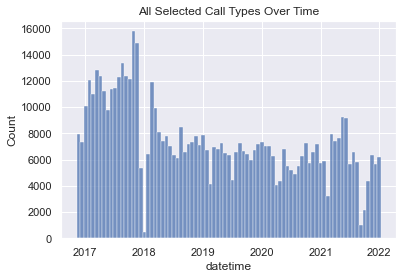

In [77]:
ax = sns.histplot(data=merged_data, x='datetime')
ax.set_title('All Selected Call Types Over Time')

In [78]:
# This cell pulls out the week as a seperate feture to use for graphing
stacked_data = merged_data[['datetime', 'nature']].copy(deep=True)
stacked_data['week'] = stacked_data['datetime'].map(lambda x: x.week)
stacked_data

,datetime,nature,week
0,2016-11-07 09:38:10,TRAFFIC STOP,45
1,2016-11-07 09:42:36,TRAFFIC STOP,45
2,2016-11-07 10:04:07,SUBJ WITH WEAPON,45
3,2016-11-07 10:12:37,TRAFFIC STOP,45
4,2016-11-07 10:21:43,TRAFFIC STOP,45
...,...,...,...
620447,2022-01-10 15:20:44,TRAFFIC STOP,2
620448,2022-01-10 15:25:10,TRAFFIC STOP,2
620449,2022-01-10 15:26:54,SHOTS FIRED,2
620450,2022-01-10 15:28:00,TRAFFIC STOP,2


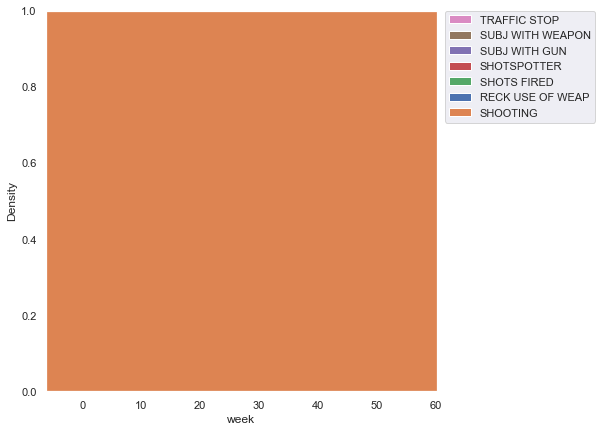

In [95]:
uses = stacked_data['nature'].unique()
plt.figure(figsize=(7,7))
ax = plt.axes()
for use in uses:
    sns.kdeplot(x=stacked_data["week"], hue=stacked_data[stacked_data['nature']==use]["nature"], ax=ax, common_norm=False, multiple="fill", alpha=1, label=use)
# ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) # https://www.statology.org/seaborn-legend-outside/
# ax.set_title("")
# ax
plt.show()
# https://stackoverflow.com/a/60679315

In [76]:
# merged_data[['datetime', 'nature']].head(10)
# merged_data['nature'].value_counts()